In [4]:
import pandas as pd
from collections import Counter
from string import punctuation
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from cleaning import remove_punctuation, remove_numbers, tokenize, prepare

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bikramgill/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load Data

In [5]:
df = pd.read_pickle('../data/interim/drugs.pkl')

In [6]:
df.head(10)

,target,text,tokens,tokens_slash,tokens_final
0,ORAL,"DOSAGE Adults- Take 4 or 6 Pellets by mouth, t...","[dosage, adults-, take, 4, or, 6, pellets, by,...","[dosage, adults-, take, 4, or, 6, pellets, by,...","[dosage, adults, take, or, pellets, by, mouth,..."
1,ORAL,DIRECTIONS Adults: Dissolve 3 to 5 under the t...,"[directions, adults:, dissolve, 3, to, 5, unde...","[directions, adults:, dissolve, 3, to, 5, unde...","[directions, adults, dissolve, to, under, the,..."
2,OPHTHALMIC,DOSAGE AND ADMINISTRATION The recommended dosa...,"[dosage, and, administration, the, recommended...","[dosage, and, administration, the, recommended...","[dosage, and, administration, the, recommended..."
3,ORAL,2 DOSAGE AND ADMINISTRATION Use the lowest eff...,"[2, dosage, and, administration, use, the, low...","[2, dosage, and, administration, use, the, low...","[dosage, and, administration, use, the, lowest..."
4,TOPICAL,"Directions wet face, apply to hand, massage fa...","[directions, wet, face,, apply, to, hand,, mas...","[directions, wet, face,, apply, to, hand,, mas...","[directions, wet, face, apply, to, hand, massa..."
5,ORAL,Dissolve pellets under the tongue 3-4 times da...,"[dissolve, pellets, under, the, tongue, 3-4, t...","[dissolve, pellets, under, the, tongue, 3-4, t...","[dissolve, pellets, under, the, tongue, times,..."
6,ORAL,2 DOSAGE AND ADMINISTRATION The recommended do...,"[2, dosage, and, administration, the, recommen...","[2, dosage, and, administration, the, recommen...","[dosage, and, administration, the, recommended..."
7,ORAL,2 DOSAGE AND ADMINISTRATION Recommended starti...,"[2, dosage, and, administration, recommended, ...","[2, dosage, and, administration, recommended, ...","[dosage, and, administration, recommended, sta..."
8,ORAL,DOSAGE AND ADMINISTRATION Methocarbamol tablet...,"[dosage, and, administration, methocarbamol, t...","[dosage, and, administration, methocarbamol, t...","[dosage, and, administration, methocarbamol, t..."
9,TOPICAL,"Directions • for itching of skin irritation, i...","[directions, •, for, itching, of, skin, irrita...","[directions, •, for, itching, of, skin, irrita...","[directions, •, for, itching, of, skin, irrita..."


# Stopwords EDA

In [7]:
stopwords_set = set(stopwords.words('english')) # will start of with english stopwords
print(len(stopwords_set)) # check the number of stopwords

179


In [8]:
print(stopwords_set) # print out the stopwords

{'other', "you'd", 'you', 'whom', 'below', 'weren', 'he', 'and', 've', "you've", 'with', 'against', 'during', 't', 'those', 'on', 'up', 'while', 'because', 'under', "mustn't", 'that', 'some', 'having', 'by', 'all', 'yourselves', 'than', 'further', "shouldn't", 'no', 'for', 'until', 'more', 'down', 'is', 'mightn', 'me', 'hasn', 'was', 'but', 'which', 'most', "shan't", 'how', 'have', "won't", 'wouldn', "needn't", 'ain', 'after', 'can', 'from', 'itself', 'should', 'why', 'needn', 'both', 'm', "weren't", 'isn', 'shouldn', 'himself', "hadn't", 'once', "aren't", 'who', 'her', 'this', 'of', 'been', 'themselves', 're', 'we', 'or', 'their', 'being', 'were', 'yourself', 'these', 'did', 'what', 'myself', 'between', 'if', 'where', 'my', 'into', 'through', 'few', 'his', 'too', 'herself', 'has', 'again', 'here', "that'll", 'doing', 'in', 'ma', 'wasn', 'at', 'above', "you're", 'will', "should've", 'such', 'couldn', "wouldn't", 'd', 'each', 'be', 'same', 'haven', "she's", 'to', 'aren', 'our', 'she', '

In [9]:
# remove punctuation from stopwords 
stopwords_set = set(map(remove_punctuation, stopwords_set))
print(stopwords_set)

{'arent', 'other', 'you', 'couldnt', 'whom', 'below', 'mightnt', 'weren', 'he', 'and', 've', 'with', 'against', 'during', 't', 'those', 'thatll', 'wasnt', 'havent', 'on', 'up', 'while', 'because', 'under', 'that', 'some', 'having', 'by', 'all', 'yourselves', 'than', 'further', 'doesnt', 'no', 'for', 'until', 'more', 'down', 'is', 'mightn', 'me', 'shes', 'hasn', 'was', 'neednt', 'most', 'but', 'which', 'how', 'have', 'wouldn', 'ain', 'after', 'can', 'from', 'itself', 'should', 'why', 'needn', 'both', 'dont', 'm', 'wont', 'isn', 'shouldn', 'himself', 'didnt', 'once', 'who', 'her', 'this', 'youll', 'of', 'been', 'themselves', 'we', 'or', 'their', 'being', 'were', 'yourself', 'these', 'did', 'mustnt', 'what', 'myself', 'between', 'if', 'where', 'my', 'into', 'through', 'few', 'his', 'too', 'herself', 'has', 'again', 'here', 'doing', 'in', 'ma', 'wasn', 'at', 'above', 'shant', 'youve', 'will', 'such', 'wouldnt', 'shouldnt', 'couldn', 'd', 'each', 'be', 'same', 'haven', 'to', 'aren', 'should

In [10]:
# function for removing the stopwords form the token column
def remove_stopwords(tokens):
    return [t for t in tokens if t not in stopwords_set]

In [11]:
# test the function
test_tokens = 'when is a good time to go running only for about five hours and again look above'.split()
remove_stopwords(test_tokens)

['good', 'time', 'go', 'running', 'five', 'hours', 'look']

In [13]:
# apply the function to the tokens
df['tokens_no_eng_stopwords'] = df['tokens_final'].apply(remove_stopwords)
df.head(10)

,target,text,tokens,tokens_slash,tokens_final,tokens_no_eng_stopwords
0,ORAL,"DOSAGE Adults- Take 4 or 6 Pellets by mouth, t...","[dosage, adults-, take, 4, or, 6, pellets, by,...","[dosage, adults-, take, 4, or, 6, pellets, by,...","[dosage, adults, take, or, pellets, by, mouth,...","[dosage, adults, take, pellets, mouth, three, ..."
1,ORAL,DIRECTIONS Adults: Dissolve 3 to 5 under the t...,"[directions, adults:, dissolve, 3, to, 5, unde...","[directions, adults:, dissolve, 3, to, 5, unde...","[directions, adults, dissolve, to, under, the,...","[directions, adults, dissolve, tongue, three, ..."
2,OPHTHALMIC,DOSAGE AND ADMINISTRATION The recommended dosa...,"[dosage, and, administration, the, recommended...","[dosage, and, administration, the, recommended...","[dosage, and, administration, the, recommended...","[dosage, administration, recommended, dosage, ..."
3,ORAL,2 DOSAGE AND ADMINISTRATION Use the lowest eff...,"[2, dosage, and, administration, use, the, low...","[2, dosage, and, administration, use, the, low...","[dosage, and, administration, use, the, lowest...","[dosage, administration, use, lowest, effectiv..."
4,TOPICAL,"Directions wet face, apply to hand, massage fa...","[directions, wet, face,, apply, to, hand,, mas...","[directions, wet, face,, apply, to, hand,, mas...","[directions, wet, face, apply, to, hand, massa...","[directions, wet, face, apply, hand, massage, ..."
5,ORAL,Dissolve pellets under the tongue 3-4 times da...,"[dissolve, pellets, under, the, tongue, 3-4, t...","[dissolve, pellets, under, the, tongue, 3-4, t...","[dissolve, pellets, under, the, tongue, times,...","[dissolve, pellets, tongue, times, daily, ages..."
6,ORAL,2 DOSAGE AND ADMINISTRATION The recommended do...,"[2, dosage, and, administration, the, recommen...","[2, dosage, and, administration, the, recommen...","[dosage, and, administration, the, recommended...","[dosage, administration, recommended, dosage, ..."
7,ORAL,2 DOSAGE AND ADMINISTRATION Recommended starti...,"[2, dosage, and, administration, recommended, ...","[2, dosage, and, administration, recommended, ...","[dosage, and, administration, recommended, sta...","[dosage, administration, recommended, starting..."
8,ORAL,DOSAGE AND ADMINISTRATION Methocarbamol tablet...,"[dosage, and, administration, methocarbamol, t...","[dosage, and, administration, methocarbamol, t...","[dosage, and, administration, methocarbamol, t...","[dosage, administration, methocarbamol, tablet..."
9,TOPICAL,"Directions • for itching of skin irritation, i...","[directions, •, for, itching, of, skin, irrita...","[directions, •, for, itching, of, skin, irrita...","[directions, •, for, itching, of, skin, irrita...","[directions, •, itching, skin, irritation, inf..."


In [14]:
print(df['tokens_no_eng_stopwords'].head(20))

0     [dosage, adults, take, pellets, mouth, three, ...
1     [directions, adults, dissolve, tongue, three, ...
2     [dosage, administration, recommended, dosage, ...
3     [dosage, administration, use, lowest, effectiv...
4     [directions, wet, face, apply, hand, massage, ...
5     [dissolve, pellets, tongue, times, daily, ages...
6     [dosage, administration, recommended, dosage, ...
7     [dosage, administration, recommended, starting...
8     [dosage, administration, methocarbamol, tablet...
9     [directions, •, itching, skin, irritation, inf...
10    [dosage, administration, dosage, thyroid, horm...
11    [directions, use, care, premature, infants, in...
12    [directions, adults, apply, sprays, onto, tong...
13    [directions, take, directed, adults, children,...
14    [directions, take, doses, hour, period, measur...
15    [directions, instill, drops, affected, eyes, n...
16    [dosage, administration, section, directions, ...
17    [dosage, administration, apply, thin, film

words such as directions,dosage appear frequently given that it a dataset involving drugs is to be expected, the next step is to plot the frequent words and add frequent ones to the stopwords


flatten_tokens[:10]: ['dosage', 'adults', 'take', 'or', 'pellets', 'by', 'mouth', 'three', 'times', 'daily']


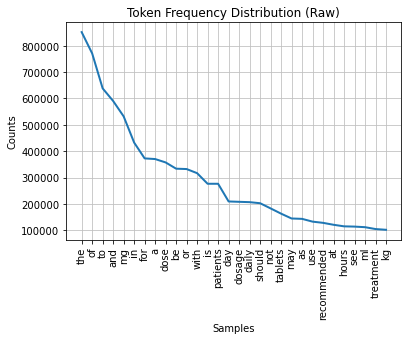

<AxesSubplot:title={'center':'Token Frequency Distribution (Raw)'}, xlabel='Samples', ylabel='Counts'>

In [15]:
# plot the raw tokens frequency distribution
flatten_tokens = [y for x in df['tokens_final'] for y in x] # flatten the list of token lists to a single list 
print("flatten_tokens[:10]:", flatten_tokens[:10])

freq_tokens = nltk.FreqDist(flatten_tokens)
freq_tokens.plot(30, cumulative=False, title='Token Frequency Distribution (Raw)')

flatten_tokens[:10]: ['dosage', 'adults', 'take', 'pellets', 'mouth', 'three', 'times', 'daily', 'suggested', 'physician']


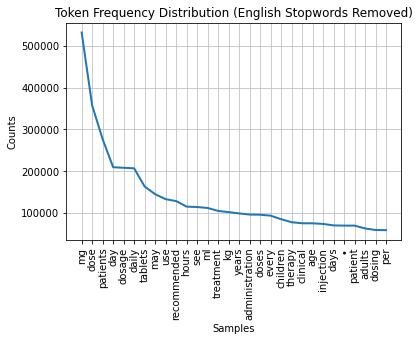

<AxesSubplot:title={'center':'Token Frequency Distribution (English Stopwords Removed)'}, xlabel='Samples', ylabel='Counts'>

In [16]:
# plot the english stopwords-removed tokens frequency distribution
flatten_tokens = [y for x in df['tokens_no_eng_stopwords'] for y in x]  # flatten the list of token lists to a single list
print("flatten_tokens[:10]:", flatten_tokens[:10])

freq_tokens = nltk.FreqDist(flatten_tokens)
freq_tokens.plot(30, cumulative=False, title='Token Frequency Distribution (English Stopwords Removed)')

Let's remove some of the words that appear very frequently. We should be careful though not to remove any words which could be predictive of route. For example, "tablets" is likely indicative of the oral route. 

In [17]:
#add new words to the stopwords list
additional_stopwords = ['dosage', 'administration', 'directions', '•']
for sw in additional_stopwords:
    stopwords_set.add(sw)
len(stopwords_set) # check to see if the words have been added

182

In [19]:
df['tokens_no_stopwords'] = df['tokens_final'].apply(remove_stopwords)

flatten_tokens[:10]: ['adults', 'take', 'pellets', 'mouth', 'three', 'times', 'daily', 'suggested', 'physician', 'children']


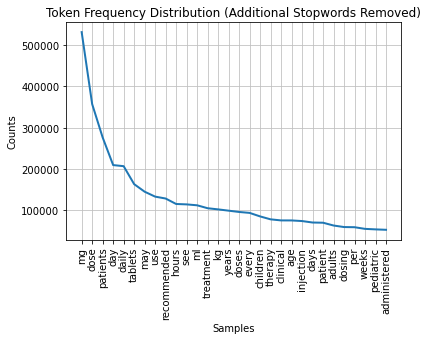

<AxesSubplot:title={'center':'Token Frequency Distribution (Additional Stopwords Removed)'}, xlabel='Samples', ylabel='Counts'>

In [20]:
# plot after additional stopword removal
flatten_tokens = [y for x in df['tokens_no_stopwords'] for y in x]
print("flatten_tokens[:10]:", flatten_tokens[:10])

freq_tokens = nltk.FreqDist(flatten_tokens)
    
freq_tokens.plot(30, cumulative=False, title='Token Frequency Distribution (Additional Stopwords Removed)')

In [21]:
df.to_pickle('../data/interim/drugs.pkl') # save the dataframe as a pickle file to the data/raw directory|

In [22]:
df

,target,text,tokens,tokens_slash,tokens_final,tokens_no_eng_stopwords,tokens_no_stopwords
0,ORAL,"DOSAGE Adults- Take 4 or 6 Pellets by mouth, t...","[dosage, adults-, take, 4, or, 6, pellets, by,...","[dosage, adults-, take, 4, or, 6, pellets, by,...","[dosage, adults, take, or, pellets, by, mouth,...","[dosage, adults, take, pellets, mouth, three, ...","[adults, take, pellets, mouth, three, times, d..."
1,ORAL,DIRECTIONS Adults: Dissolve 3 to 5 under the t...,"[directions, adults:, dissolve, 3, to, 5, unde...","[directions, adults:, dissolve, 3, to, 5, unde...","[directions, adults, dissolve, to, under, the,...","[directions, adults, dissolve, tongue, three, ...","[adults, dissolve, tongue, three, times, day, ..."
2,OPHTHALMIC,DOSAGE AND ADMINISTRATION The recommended dosa...,"[dosage, and, administration, the, recommended...","[dosage, and, administration, the, recommended...","[dosage, and, administration, the, recommended...","[dosage, administration, recommended, dosage, ...","[recommended, regimen, treatment, bacterial, c..."
3,ORAL,2 DOSAGE AND ADMINISTRATION Use the lowest eff...,"[2, dosage, and, administration, use, the, low...","[2, dosage, and, administration, use, the, low...","[dosage, and, administration, use, the, lowest...","[dosage, administration, use, lowest, effectiv...","[use, lowest, effective, shortest, duration, c..."
4,TOPICAL,"Directions wet face, apply to hand, massage fa...","[directions, wet, face,, apply, to, hand,, mas...","[directions, wet, face,, apply, to, hand,, mas...","[directions, wet, face, apply, to, hand, massa...","[directions, wet, face, apply, hand, massage, ...","[wet, face, apply, hand, massage, face, gently..."
...,...,...,...,...,...,...,...
85642,TOPICAL,DOSAGE AND ADMINISTRATION: Comb the hair to re...,"[dosage, and, administration:, comb, the, hair...","[dosage, and, administration:, comb, the, hair...","[dosage, and, administration, comb, the, hair,...","[dosage, administration, comb, hair, remove, s...","[comb, hair, remove, scaly, debris, suitably, ..."
85643,ORAL,DOSAGE AND ADMINISTRATION Hypertension Individ...,"[dosage, and, administration, hypertension, in...","[dosage, and, administration, hypertension, in...","[dosage, and, administration, hypertension, in...","[dosage, administration, hypertension, individ...","[hypertension, individualize, metoprolol, tart..."
85644,ORAL,Take 3-4 times daily. Ages 12 and older: 10 dr...,"[take, 3-4, times, daily., ages, 12, and, olde...","[take, 3-4, times, daily., ages, 12, and, olde...","[take, times, daily, ages, and, older, drops, ...","[take, times, daily, ages, older, drops, ages,...","[take, times, daily, ages, older, drops, ages,..."
85645,TOPICAL,Directions apply to underarms only,"[directions, apply, to, underarms, only]","[directions, apply, to, underarms, only]","[directions, apply, to, underarms, only]","[directions, apply, underarms]","[apply, underarms]"
